## <font color="maroon"><h4 align="center">Handling Missing Data - fillna, interpolate, dropna</font>

In [11]:
#data cleaning/data munging
import pandas as pd
df = pd.read_csv("weather_data_missing.csv")
#df = pd.read_csv("weather_data_missing.csv",index_col='day',parse_dates=['day'])
#df = pd.read_csv("weather_data_missing.csv",skiprows =3,parse_dates=['day'])
#type(df.day[0])
df


,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,NaN,9.0,Sunny
2,01-05-2017,28.0,NaN,Snow
3,01-06-2017,NaN,7.0,NaN
4,01-07-2017,32.0,NaN,Rain
5,01-08-2017,NaN,NaN,Sunny
6,01-09-2017,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,01-11-2017,3.0,45.0,NaN


In [12]:
df.set_index('day',inplace=True)
#df.loc["01-07-2017"]
df
#df.info()

,temperature,windspeed,event
day,,,
01-01-2017,32.0,6.0,Rain
01-04-2017,NaN,9.0,Sunny
01-05-2017,28.0,NaN,Snow
01-06-2017,NaN,7.0,NaN
01-07-2017,32.0,NaN,Rain
01-08-2017,NaN,NaN,Sunny
01-09-2017,NaN,NaN,NaN
01-10-2017,34.0,8.0,Cloudy
01-11-2017,40.0,12.0,Sunny


In [13]:
df.reset_index(inplace=True)
df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,NaN,9.0,Sunny
2,01-05-2017,28.0,NaN,Snow
3,01-06-2017,NaN,7.0,NaN
4,01-07-2017,32.0,NaN,Rain
5,01-08-2017,NaN,NaN,Sunny
6,01-09-2017,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,01-11-2017,3.0,45.0,NaN


In [14]:
df.isnull()

,day,temperature,windspeed,event
0,False,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,True,False,True
4,False,False,True,False
5,False,True,True,False
6,False,True,True,True
7,False,False,False,False
8,False,False,False,False
9,False,False,False,True


<Axes: >

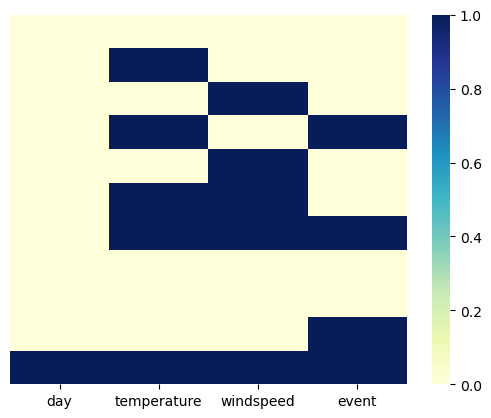

In [17]:
import seaborn as sns
#sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
#sns.color_palette("rocket", as_cmap=True)
sns.heatmap(df.isnull(),yticklabels=False,cmap="YlGnBu")

In [15]:
#df.reset_index('day',inplace=True)
df.reset_index(inplace=True)
df
#df.info()


,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,NaN,9.0,Sunny
2,01-05-2017,28.0,NaN,Snow
3,01-06-2017,NaN,7.0,NaN
4,01-07-2017,32.0,NaN,Rain
5,01-08-2017,NaN,NaN,Sunny
6,01-09-2017,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny


## <font color="blue">fillna</font>

<font color="purple">**Fill all NaN with one specific value**</font>

In [18]:
#thresh= 2 Require that minimum 2 non-NA values.
#new_df=df.dropna(thresh=2)
new_df = df.fillna(0)
print(new_df)
new_df.info()

           day  temperature  windspeed   event
0   01-01-2017         32.0        6.0    Rain
1   01-04-2017          0.0        9.0   Sunny
2   01-05-2017         28.0        0.0    Snow
3   01-06-2017          0.0        7.0       0
4   01-07-2017         32.0        0.0    Rain
5   01-08-2017          0.0        0.0   Sunny
6   01-09-2017          0.0        0.0       0
7   01-10-2017         34.0        8.0  Cloudy
8   01-11-2017         40.0       12.0   Sunny
9   01-11-2017          3.0       45.0       0
10           0          0.0        0.0       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          11 non-null     object 
 1   temperature  11 non-null     float64
 2   windspeed    11 non-null     float64
 3   event        11 non-null     object 
dtypes: float64(2), object(2)
memory usage: 480.0+ bytes


<font color="purple">**Fill na using column names and dict**</font>

In [19]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed': 1,
        'event': 'No Event'
    })
new_df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,0.0,9.0,Sunny
2,01-05-2017,28.0,1.0,Snow
3,01-06-2017,0.0,7.0,No Event
4,01-07-2017,32.0,1.0,Rain
5,01-08-2017,0.0,1.0,Sunny
6,01-09-2017,0.0,1.0,No Event
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,01-11-2017,3.0,45.0,No Event


In [ ]:
new_df=df.copy()
new_df['temperature'].fillna(new_df['temperature'].mean(),inplace=True)
new_df['windspeed'].fillna(new_df['windspeed'].mean(),inplace=True)
new_df

<font color="purple">**Use method to determine how to fill na values**</font>

In [4]:
df
new_df = df.fillna(method="ffill") #forward fill
new_df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,32.0,9.0,Sunny
2,01-05-2017,28.0,9.0,Snow
3,01-06-2017,28.0,7.0,Snow
4,01-07-2017,32.0,7.0,Rain
5,01-08-2017,32.0,7.0,Sunny
6,01-09-2017,32.0,7.0,Sunny
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny


In [ ]:
#ffill on specific column
new_df=df.loc[:,'windspeed'].ffill()
new_df


In [5]:
new_df = df.fillna(method="bfill")
new_df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,28.0,9.0,Sunny
2,01-05-2017,28.0,7.0,Snow
3,01-06-2017,32.0,7.0,Rain
4,01-07-2017,32.0,8.0,Rain
5,01-08-2017,34.0,8.0,Sunny
6,01-09-2017,34.0,8.0,Cloudy
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny


<font color="purple">**Use of axis**</font>

In [ ]:
new_df = df.fillna(method="bfill", axis="columns") # axis is either "index" or "columns"
new_df

<font color="purple">**limit parameter**</font>

In [7]:
#limit will specify how many values should get replace
new_df = df.fillna(method="ffill",limit=2)
#new_df = df.fillna(method="ffill")
new_df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,32.0,9.0,Sunny
2,01-05-2017,28.0,9.0,Snow
3,01-06-2017,28.0,7.0,Snow
4,01-07-2017,32.0,7.0,Rain
5,01-08-2017,32.0,7.0,Sunny
6,01-09-2017,32.0,NaN,Sunny
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny


### <font color="blue">interpolate</font>

In [6]:
new_df = df.interpolate()
new_df

,day,temperature,windspeed,event
0,01-01-2017,32.000000,6.00,Rain
1,01-04-2017,30.000000,9.00,Sunny
2,01-05-2017,28.000000,8.00,Snow
3,01-06-2017,30.000000,7.00,NaN
4,01-07-2017,32.000000,7.25,Rain
5,01-08-2017,32.666667,7.50,Sunny
6,01-09-2017,33.333333,7.75,NaN
7,01-10-2017,34.000000,8.00,Cloudy
8,01-11-2017,40.000000,12.00,Sunny


In [ ]:
new_df = df.interpolate() 
new_df

In [8]:

df['temperature f']=df['temperature'].map(lambda x:x+10)
df




,day,temperature,windspeed,event,temperature f
0,01-01-2017,32.0,6.0,Rain,42.0
1,01-04-2017,NaN,9.0,Sunny,NaN
2,01-05-2017,28.0,NaN,Snow,38.0
3,01-06-2017,NaN,7.0,NaN,NaN
4,01-07-2017,32.0,NaN,Rain,42.0
5,01-08-2017,NaN,NaN,Sunny,NaN
6,01-09-2017,NaN,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy,44.0
8,01-11-2017,40.0,12.0,Sunny,50.0


In [20]:
def myconvert(num):
    if num<30:
        return num+10
    elif num>=30 and num<35:
        return num+20
    else:
        return num+30
    
df['temperature f']=df['temperature'].apply(myconvert) 
df

,day,temperature,windspeed,event,temperature f
0,01-01-2017,32.0,6.0,Rain,52.0
1,01-04-2017,NaN,9.0,Sunny,NaN
2,01-05-2017,28.0,NaN,Snow,38.0
3,01-06-2017,NaN,7.0,NaN,NaN
4,01-07-2017,32.0,NaN,Rain,52.0
5,01-08-2017,NaN,NaN,Sunny,NaN
6,01-09-2017,NaN,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy,54.0
8,01-11-2017,40.0,12.0,Sunny,70.0
9,01-11-2017,3.0,45.0,NaN,13.0


**Notice that in above temperature on 2017-01-04 is 29 instead of 30 (in plain linear interpolate)**

**There are many other methods for interpolation such as quadratic, piecewise_polynomial, cubic etc. 
Just google "dataframe interpolate" to see complete documentation**

### <font color="blue">dropna</font>

In [ ]:
new_df = df.dropna()    
new_df

In [ ]:
new_df =df.dropna(how='all')
new_df

In [ ]:
new_df = df.dropna(thresh=2)
new_df
#less that 2 not null values
  

### <font color="blue">Inserting Missing Dates</font>

In [ ]:
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df.reindex(idx)